# Imports

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/sleep_health_clean.csv")

# Analysis Questions

- Are higher levels of stress associated with lower duration of sleep?
- Does an individual's physical activity level correlate with their quality of sleep?
- Are there certain occupations that are linked to the presence of sleep disorders?
- How does age affect the duration and quality of sleep?
- Does an individual's blood pressure level have any impact on their quality of sleep?

# Exploration: Stress vs Sleep Duration

Visualization: The relationship between stress level and sleep duration.

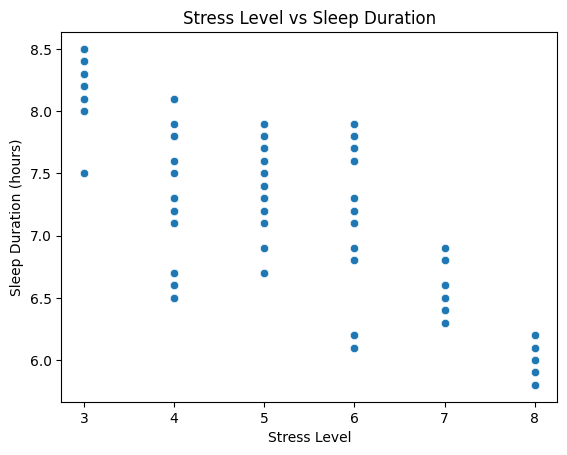

In [34]:
sns.scatterplot(data=df, x="stress_level", y="sleep_duration")
plt.title("Stress Level vs Sleep Duration")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()

Analysis: Check for outliers with a box and whisker plot

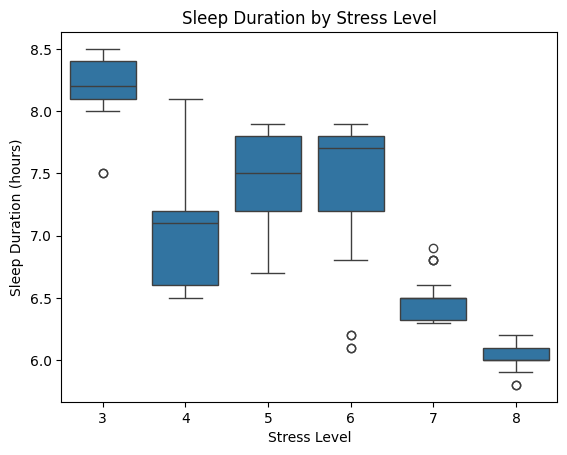

In [35]:
sns.boxplot(data=df, x="stress_level", y="sleep_duration")
plt.title("Sleep Duration by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.show()

Correlation

In [36]:
df[["stress_level", "sleep_duration"]].corr()

,stress_level,sleep_duration
stress_level,1.000000,-0.811023
sleep_duration,-0.811023,1.000000


### Findings:
- There appears to be a strong negative correlation (~0.8) between stress level and sleep duration.
- As a user's stress level increases, their duration of sleep tends to decrease.
- There are a few statistical outliers which fall outside of the whiskers of the box plot.
    - Generally, there are no unusually high or low sleep durations recorded

# Exploration: Age vs Sleep Duration/Quality

Visualization: The relationship between age and sleep duration

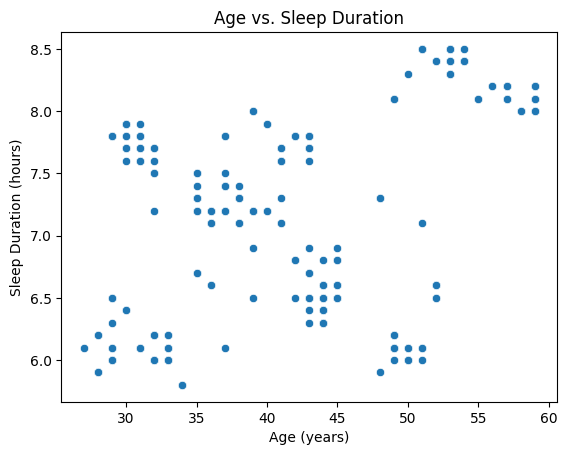

In [37]:
sns.scatterplot(data=df, x="age", y="sleep_duration")
plt.xlabel("Age (years)")
plt.ylabel("Sleep Duration (hours)")
plt.title("Age vs. Sleep Duration")
plt.show()

Correlation

In [38]:
df[["age", "sleep_duration"]].corr()

,age,sleep_duration
age,1.000000,0.344709
sleep_duration,0.344709,1.000000


Visualization: The impact of age on sleep quality

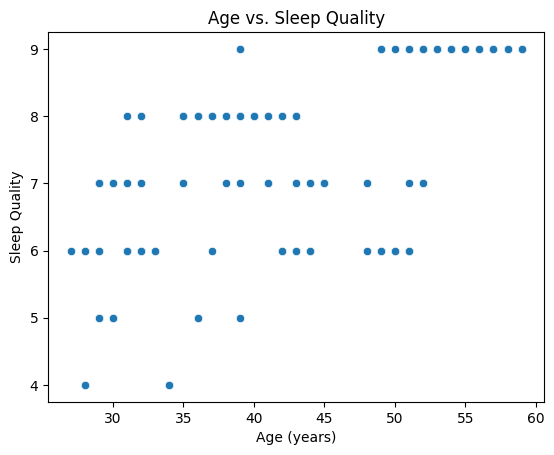

In [39]:
sns.scatterplot(data=df, x="age", y="quality_of_sleep")
plt.xlabel("Age (years)")
plt.ylabel("Sleep Quality")
plt.title("Age vs. Sleep Quality")
plt.show()

Correlation

In [40]:
df[["age", "quality_of_sleep"]].corr()

,age,quality_of_sleep
age,1.000000,0.473734
quality_of_sleep,0.473734,1.000000


### Findings:
- There appears to be no relevant correlation between age and sleep duration.
    - As age increases, there is variation in the amount of sleep duration.
- The correlation between age and sleep quality is higher, but still weak.
    - Participants from ages 55-60 in particular had the highest sleep quality.


# Exploration: Occupation vs Sleep Disorders

Types of occupations and sleep disorders recorded

In [41]:
print(df["sleep_disorder"].unique())
print(df["occupation"].unique())

[nan 'Sleep Apnea' 'Insomnia']
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


Visualization: Count of sleep disorder type per occupation

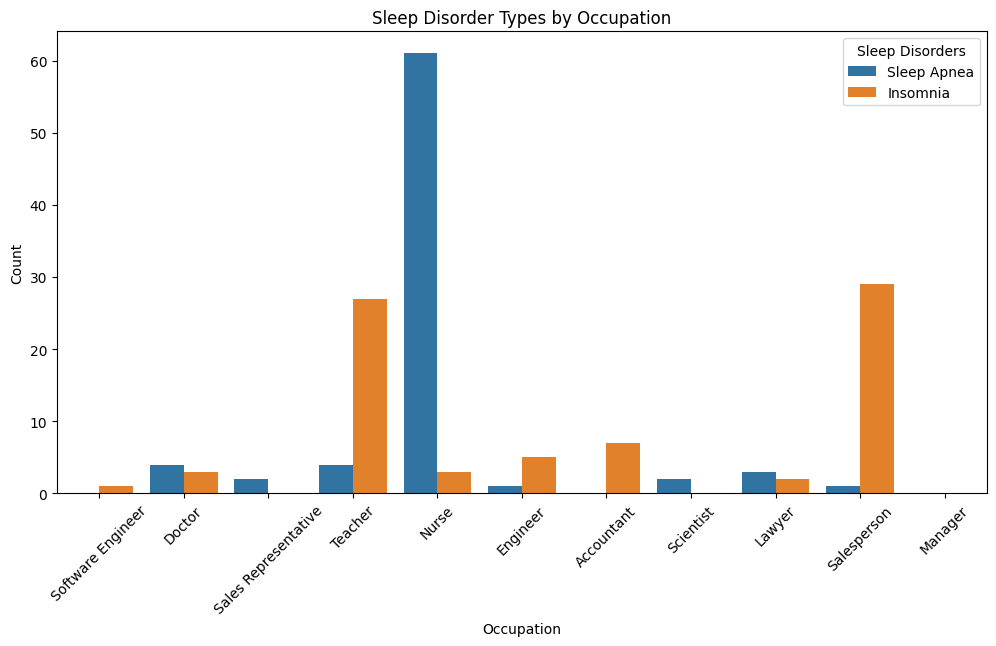

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="occupation", hue="sleep_disorder")
plt.title("Sleep Disorder Types by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sleep Disorders")
plt.show()


### Findings:
- Many sleep disorder results are similar across occupation with low distributions of sleep apnea and insomnia - indicating the majority of participants had no sleep disorders.
- While nurses had a similar amount of insomnia cases as other occupations, the number of nurses with sleep apnea far exceeds all other sleep apnea cases across occupations combined.
- Teachers and salespeople had a low amount of sleep apnea cases, but reached 25-30 cases of insomnia each, almost meeting the number of sleep apnea cases in nurses when combined.
- It is important to note some occupations did not have any cases of specific sleep disorders, but managers were the only occupation to have zero total sleep disorder cases.

# Exploration: Physical Activity vs Sleep Quality

Visualization: Relationship between physical activity and sleep quality

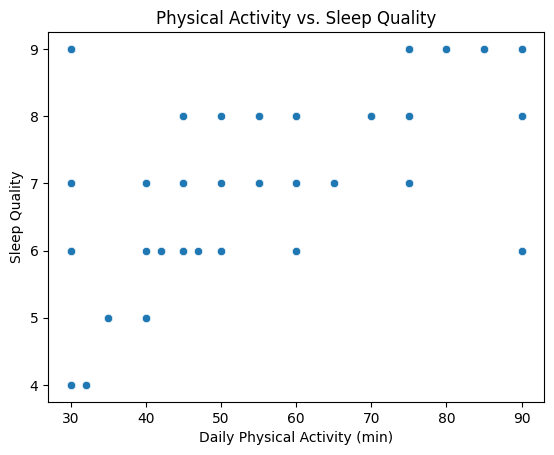

In [43]:
sns.scatterplot(data=df, x="physical_activity_level", y="quality_of_sleep")
plt.xlabel("Daily Physical Activity (min)")
plt.ylabel("Sleep Quality")
plt.title("Physical Activity vs. Sleep Quality")
plt.show()

Correlation

In [44]:
df[["physical_activity_level", "quality_of_sleep"]].corr()

,physical_activity_level,quality_of_sleep
physical_activity_level,1.000000,0.192896
quality_of_sleep,0.192896,1.000000


### Findings:
- There is a positive trend between physical activity and sleep quality, which indicates that higher daily physical activity may result in better sleep quality.
- However, the correlation coefficient is 0.19, indicating that there is a weak relationship between the two variables.
- For sleep quality scores such as 7 and 8, there is significant variation in the amount of daily physical activity, showing that physical activity itself does not have a major correlation.
- The minimum daily physical activity recorded was 30 minutes, which may be a limiting factor in determining the relationship between the two variables.
    - How would less than 30 minutes of daily physical activity impact sleep quality?

# Exploration: Blood Pressure Levels vs Sleep Quality


In [ ]:
# Extract blood pressure values into separate columns
df[["systolic", "diastolic"]] = df["blood_pressure"].str.split("/", expand=True)
df["systolic"] = pd.to_numeric(df["systolic"])
df["diastolic"] = pd.to_numeric(df["diastolic"])

Visualization: Relationship between systolic blood pressure and sleep quality

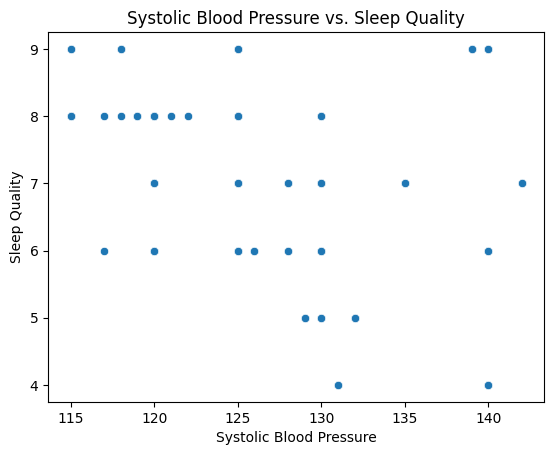

In [46]:
sns.scatterplot(data=df, x="systolic", y="quality_of_sleep")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Sleep Quality")
plt.title("Systolic Blood Pressure vs. Sleep Quality")
plt.show()

Correlation

In [47]:
df[["systolic", "quality_of_sleep"]].corr()

,systolic,quality_of_sleep
systolic,1.000000,-0.121632
quality_of_sleep,-0.121632,1.000000


Visualization: Relationship between diastolic blood pressure and sleep quality

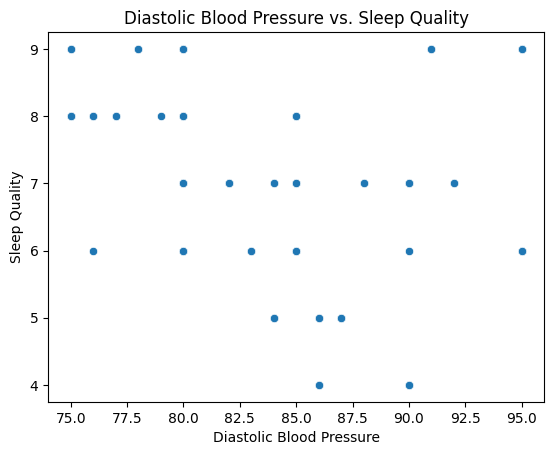

In [48]:
sns.scatterplot(data=df, x="diastolic", y="quality_of_sleep")
plt.xlabel("Diastolic Blood Pressure")
plt.ylabel("Sleep Quality")
plt.title("Diastolic Blood Pressure vs. Sleep Quality")
plt.show()

Correlation

In [49]:
df[["diastolic", "quality_of_sleep"]].corr()

,diastolic,quality_of_sleep
diastolic,1.000000,-0.110151
quality_of_sleep,-0.110151,1.000000


### Findings:
- In both blood pressure levels (systolic and diastolic) there is a very weak negative correlation with sleep quality
    - Systolic: -0.121
    - Diastolic: 0.110
- This means that although an increase in blood pressure is considered to lead to lower sleep quality, there is a very weak link between the variables, meaning that no reasonable correlation exists.
- Some of the highest sleep quality scores reported (8 and 9) are associated with some of the lowest systolic and diastolic blood pressure levels
    - However, individuals with higher blood pressure levels were still able to have high quality of sleep